In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
lead_data=pd.read_csv("Leads.csv")

In [3]:
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
lead_data.shape

(9240, 37)

In [5]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Handling 'Select' values in the data:

In [6]:
lead_data = lead_data.replace('Select', np.nan)

In [7]:
lead_data_missing = lead_data.count()/len(lead_data)
lead_data_missing = (1-lead_data_missing)*100
lead_data_missing.sort_values(ascending=False).head(60)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [8]:
lead_data['How did you hear about X Education'].value_counts(dropna=False)

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [9]:
lead_data['Lead Profile'].value_counts(dropna=False)

NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [10]:
lead_data['Lead Quality'].value_counts(dropna=False)

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [11]:
lead_data['Asymmetrique Activity Index'].value_counts(dropna=False)

NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [12]:
lead_data['Asymmetrique Profile Score'].value_counts(dropna=False)

NaN     4218
15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [13]:
lead_data['Asymmetrique Activity Score'].value_counts(dropna=False)

NaN     4218
14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [14]:
lead_data['Asymmetrique Profile Index'].value_counts(dropna=False)

NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

# Dropping columns with missing value >45%

In [15]:
lead_data.shape

(9240, 37)

In [16]:
lead_data_missing = lead_data.count()/len(lead_data)
lead_data_missing = (1-lead_data_missing)*100
lead_data_missing.sort_values(ascending=False).head(60)

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [17]:
lead_data.drop(['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Activity Index','Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index'],axis=1,inplace=True)

In [18]:
lead_data.shape

(9240, 30)

In [19]:
lead_data_missing = lead_data.count()/len(lead_data)
lead_data_missing = (1-lead_data_missing)*100
lead_data_missing.sort_values(ascending=False).head(60)

City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Through Recommendations                           0.000000
Receive More Updates About Our Courses            0.000000
Prospect ID                                       0.000000
Newspaper                                         0.000000
Update me on Supply Chain Content                 0.000000
Get updates on DM Content                         0.000000
I agree to pay the amount through cheque          0.0000

# Missing values handling(imputation)

In [20]:
lead_data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [21]:
lead_data['City'].mode()[0]

'Mumbai'

In [22]:
lead_data['City']=lead_data['City'].fillna(lead_data['City'].mode()[0])

In [23]:
lead_data['City'].value_counts(dropna=False)

Mumbai                         6891
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [24]:
lead_data['City'].value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [25]:
lead_data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [26]:
lead_data['Specialization'] = lead_data['Specialization'].fillna('Blank')

In [27]:
lead_data['Specialization'].value_counts(dropna=False)

Blank                                3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [28]:
lead_data['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [29]:
lead_data['Tags'] = lead_data['Tags'].fillna('Blank')

In [30]:
lead_data['Tags'].value_counts(dropna=False)

Blank                                                3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

In [31]:
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [32]:
lead_data['What matters most to you in choosing a course']=lead_data['What matters most to you in choosing a course'].fillna(lead_data['What matters most to you in choosing a course'].mode()[0])

In [33]:
lead_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [34]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999675
Flexibility & Convenience    0.000216
Other                        0.000108
Name: What matters most to you in choosing a course, dtype: float64

In [35]:
lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [36]:
lead_data['What is your current occupation']=lead_data['What is your current occupation'].fillna(lead_data['What is your current occupation'].mode()[0])

In [37]:
lead_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [38]:
lead_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [39]:
lead_data['Country'].value_counts(dropna=False)

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [40]:
lead_data['Country']=lead_data['Country'].fillna(lead_data['Country'].mode()[0])

In [41]:
lead_data['Country'].value_counts(normalize=True)

India                   0.968939
United States           0.007468
United Arab Emirates    0.005736
Singapore               0.002597
Saudi Arabia            0.002273
United Kingdom          0.001623
Australia               0.001407
Qatar                   0.001082
Hong Kong               0.000758
Bahrain                 0.000758
Oman                    0.000649
France                  0.000649
unknown                 0.000541
South Africa            0.000433
Nigeria                 0.000433
Germany                 0.000433
Kuwait                  0.000433
Canada                  0.000433
Sweden                  0.000325
China                   0.000216
Asia/Pacific Region     0.000216
Uganda                  0.000216
Bangladesh              0.000216
Italy                   0.000216
Belgium                 0.000216
Netherlands             0.000216
Ghana                   0.000216
Philippines             0.000216
Russia                  0.000108
Switzerland             0.000108
Vietnam   

In [42]:
lead_data_missing = lead_data.count()/len(lead_data)
lead_data_missing = (1-lead_data_missing)*100
lead_data_missing.sort_values(ascending=False).head(60)

TotalVisits                                      1.482684
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Lead Source                                      0.389610
Prospect ID                                      0.000000
Newspaper                                        0.000000
Digital Advertisement                            0.000000
Through Recommendations                          0.000000
Receive More Updates About Our Courses           0.000000
Tags                                             0.000000
Update me on Supply Chain Content                0.000000
Newspaper Article                                0.000000
Get updates on DM Content                        0.000000
City                                             0.000000
I agree to pay the amount through cheque         0.000000
A free copy of Mastering The Interview           0.000000
X Education Forums                               0.000000
Search        

In [43]:
lead_data.isnull().any(axis = 1).sum()

166

In [44]:
lead_data.shape

(9240, 30)

In [45]:
lead_data = lead_data.dropna()

In [46]:
lead_data.shape

(9074, 30)

In [47]:
lead_data['Page Views Per Visit'].value_counts(dropna=False)

0.00    2161
2.00    1794
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [48]:
lead_data['Page Views Per Visit'].value_counts(normalize=True)

0.00    0.238153
2.00    0.197708
3.00    0.131805
4.00    0.098744
1.00    0.071743
          ...   
3.43    0.000110
2.56    0.000110
6.33    0.000110
1.64    0.000110
2.08    0.000110
Name: Page Views Per Visit, Length: 114, dtype: float64

In [49]:
lead_data_missing = lead_data.count()/len(lead_data)
lead_data_missing = (1-lead_data_missing)*100
lead_data_missing.sort_values(ascending=False).head(60)

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation                  0.0
Specialization                                

In [50]:
lead_data['TotalVisits'].value_counts(dropna=False)

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [51]:
lead_data['Last Activity'].value_counts(dropna=False)

Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [52]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

# Removing unwanted ID columns 

In [53]:
lead_data['Prospect ID'].value_counts()

7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
5379ee79-64b7-44f8-8c56-0e1ca2d5b887    1
9757ace3-0656-4400-b519-fe0e3c67599e    1
889c1057-97ab-477c-a2b7-423e7df2d226    1
dd5ed9c0-298b-416e-b7e3-ee4da8511b8f    1
                                       ..
bff6c61d-25e3-4b1e-bf17-b634c91f3e2f    1
c62678c1-e741-4874-b5cf-500b2e8e2a78    1
4e859886-6ae2-462b-abd0-1df6ae65d8bf    1
78a9c58c-c287-41e3-a0f5-034061b73343    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: Prospect ID, Length: 9074, dtype: int64

In [54]:
lead_data['Prospect ID'].duplicated().any()

False

In [55]:
lead_data['Lead Number'].duplicated().any()

False

In [56]:
lead_data.drop(['Prospect ID'],axis=1,inplace=True)

In [57]:
lead_data.shape

(9074, 29)

# Drop columns with high imbalance >85%

In [58]:
lead_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.99978
Flexibility & Convenience    0.00011
Other                        0.00011
Name: What matters most to you in choosing a course, dtype: float64

In [59]:
lead_data['Country'].value_counts(normalize=True)

India                   0.968371
United States           0.007604
United Arab Emirates    0.005841
Singapore               0.002645
Saudi Arabia            0.002314
United Kingdom          0.001653
Australia               0.001433
Qatar                   0.001102
Hong Kong               0.000771
Bahrain                 0.000771
Oman                    0.000661
France                  0.000661
unknown                 0.000551
South Africa            0.000441
Nigeria                 0.000441
Germany                 0.000441
Kuwait                  0.000441
Canada                  0.000441
Sweden                  0.000331
China                   0.000220
Asia/Pacific Region     0.000220
Uganda                  0.000220
Bangladesh              0.000220
Italy                   0.000220
Belgium                 0.000220
Netherlands             0.000220
Ghana                   0.000220
Philippines             0.000220
Russia                  0.000110
Switzerland             0.000110
Vietnam   

In [60]:
lead_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.899162
Working Professional    0.074609
Student                 0.022702
Other                   0.001653
Housewife               0.000992
Businessman             0.000882
Name: What is your current occupation, dtype: float64

In [61]:
lead_data['City'].value_counts(normalize=True)

Mumbai                         0.744104
Thane & Outskirts              0.082103
Other Cities                   0.074939
Other Cities of Maharashtra    0.049151
Other Metro Cities             0.041547
Tier II Cities                 0.008155
Name: City, dtype: float64

In [62]:
lead_data['Specialization'].value_counts(normalize=True)

Blank                                0.361693
Finance Management                   0.105687
Human Resource Management            0.092242
Marketing Management                 0.090699
Operations Management                0.054992
Business Administration              0.043972
IT Projects Management               0.040335
Supply Chain Management              0.038131
Banking, Investment And Insurance    0.036919
Travel and Tourism                   0.022261
Media and Advertising                0.022261
International Business               0.019396
Healthcare Management                0.017192
E-COMMERCE                           0.012233
Hospitality Management               0.012233
Retail Management                    0.011020
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

In [63]:
lead_data['Specialization'].value_counts(normalize=True)

Blank                                0.361693
Finance Management                   0.105687
Human Resource Management            0.092242
Marketing Management                 0.090699
Operations Management                0.054992
Business Administration              0.043972
IT Projects Management               0.040335
Supply Chain Management              0.038131
Banking, Investment And Insurance    0.036919
Travel and Tourism                   0.022261
Media and Advertising                0.022261
International Business               0.019396
Healthcare Management                0.017192
E-COMMERCE                           0.012233
Hospitality Management               0.012233
Retail Management                    0.011020
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

In [64]:
lead_data['Specialization'] = lead_data['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence'],'Others')

In [65]:
lead_data['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: float64

In [66]:
lead_data['Lead Source'].value_counts(normalize=True)

Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Press_Release        0.000220
Social Media         0.000220
Live Chat            0.000220
youtubechannel       0.000110
testone              0.000110
Pay per Click Ads    0.000110
welearnblog_Home     0.000110
WeLearn              0.000110
blog                 0.000110
NC_EDM               0.000110
Name: Lead Source, dtype: float64

In [67]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'],'Google')

In [68]:
lead_data['Lead Source'].value_counts(normalize=True)

Google               0.316619
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
Click2call           0.000441
Social Media         0.000220
Live Chat            0.000220
Press_Release        0.000220
Pay per Click Ads    0.000110
blog                 0.000110
WeLearn              0.000110
welearnblog_Home     0.000110
youtubechannel       0.000110
testone              0.000110
NC_EDM               0.000110
Name: Lead Source, dtype: float64

In [69]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Facebook','bing','Click2call','Social Media','Live Chat','Press_Release','Pay per Click Ads','blog','WeLearn','welearnblog_Home','youtubechannel','testone','NC_EDM','Referral Sites'],'Others')

In [70]:
lead_data['Lead Source'].value_counts(normalize=True)

Google              0.316619
Direct Traffic      0.280251
Olark Chat          0.193189
Organic Search      0.127177
Reference           0.048821
Others              0.019727
Welingak Website    0.014216
Name: Lead Source, dtype: float64

In [71]:
lead_data['Tags'].value_counts(normalize=True)

Blank                                                0.366652
Will revert after reading the email                  0.222173
Ringing                                              0.130813
Interested in other courses                          0.056094
Already a student                                    0.051245
Closed by Horizzon                                   0.033172
switched off                                         0.026449
Busy                                                 0.020388
Lost to EINS                                         0.018955
Not doing further education                          0.015980
Interested  in full time MBA                         0.012784
Graduation in progress                               0.012233
invalid number                                       0.009147
Diploma holder (Not Eligible)                        0.006943
wrong number given                                   0.005180
opp hangup                                           0.003637
number n

In [72]:
lead_data['Tags'] = lead_data['Tags'].replace(['switched off',
'Busy',
'Lost to EINS',
'Not doing further education',
'Interested  in full time MBA',
'Graduation in progress',
'invalid number',
'Diploma holder (Not Eligible)',
'wrong number given',
'opp hangup',
'number not provided',
'in touch with EINS',
'Lost to Others',
'Still Thinking',
'Want to take admission but has financial problems',
'In confusion whether part time or DLP',
'Interested in Next batch',
'Lateral student',
'Shall take in the next coming month',
'University not recognized',
'Recognition issue (DEC approval)'],'Others')

In [73]:
lead_data['Tags'].value_counts(normalize=True)

Blank                                  0.366652
Will revert after reading the email    0.222173
Others                                 0.139850
Ringing                                0.130813
Interested in other courses            0.056094
Already a student                      0.051245
Closed by Horizzon                     0.033172
Name: Tags, dtype: float64

In [74]:
lead_data['Do Not Email'].value_counts(normalize=True)

No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64

In [75]:
lead_data['Do Not Call'].value_counts(normalize=True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

In [76]:
lead_data['Converted'].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

In [77]:
lead_data['TotalVisits'].value_counts(normalize=True)

0.0      0.238153
2.0      0.185034
3.0      0.143928
4.0      0.123430
5.0      0.086291
6.0      0.051356
1.0      0.043531
7.0      0.034053
8.0      0.024686
9.0      0.018074
10.0     0.012563
11.0     0.009478
13.0     0.005290
12.0     0.004959
14.0     0.003967
16.0     0.002314
15.0     0.001984
17.0     0.001763
18.0     0.001653
20.0     0.001322
19.0     0.000992
21.0     0.000661
23.0     0.000661
24.0     0.000551
25.0     0.000551
27.0     0.000551
22.0     0.000331
29.0     0.000220
28.0     0.000220
26.0     0.000220
141.0    0.000110
55.0     0.000110
30.0     0.000110
43.0     0.000110
74.0     0.000110
41.0     0.000110
54.0     0.000110
115.0    0.000110
251.0    0.000110
32.0     0.000110
42.0     0.000110
Name: TotalVisits, dtype: float64

In [78]:
lead_data['Total Time Spent on Website'].value_counts(normalize=True)

0       0.238594
60      0.002094
127     0.001984
75      0.001984
74      0.001873
          ...   
609     0.000110
1035    0.000110
802     0.000110
840     0.000110
927     0.000110
Name: Total Time Spent on Website, Length: 1717, dtype: float64

In [79]:
lead_data['Page Views Per Visit'].value_counts(normalize=True)

0.00    0.238153
2.00    0.197708
3.00    0.131805
4.00    0.098744
1.00    0.071743
          ...   
3.43    0.000110
2.56    0.000110
6.33    0.000110
1.64    0.000110
2.08    0.000110
Name: Page Views Per Visit, Length: 114, dtype: float64

In [80]:
lead_data['Last Activity'].value_counts(normalize=True)

Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Received                  0.000220
Email Marked Spam               0.000220
Visited Booth in Tradeshow      0.000110
Resubscribed to emails          0.000110
Name: Last Activity, dtype: float64

In [81]:
lead_data['Search'].value_counts(normalize=True)

No     0.998457
Yes    0.001543
Name: Search, dtype: float64

In [82]:
lead_data['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [83]:
lead_data['Newspaper Article'].value_counts()

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

In [84]:
lead_data['X Education Forums'].value_counts()

No     9073
Yes       1
Name: X Education Forums, dtype: int64

In [85]:
lead_data['Newspaper'].value_counts()

No     9073
Yes       1
Name: Newspaper, dtype: int64

In [86]:
lead_data['Digital Advertisement'].value_counts()

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

In [87]:
lead_data['Through Recommendations'].value_counts()

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

In [88]:
lead_data['Receive More Updates About Our Courses'].value_counts()

No    9074
Name: Receive More Updates About Our Courses, dtype: int64

In [89]:
lead_data['Update me on Supply Chain Content'].value_counts()

No    9074
Name: Update me on Supply Chain Content, dtype: int64

In [90]:
lead_data['Get updates on DM Content'].value_counts()

No    9074
Name: Get updates on DM Content, dtype: int64

In [91]:
lead_data['I agree to pay the amount through cheque'].value_counts()

No    9074
Name: I agree to pay the amount through cheque, dtype: int64

In [92]:
lead_data['A free copy of Mastering The Interview'].value_counts()

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [93]:
lead_data['Last Notable Activity'].value_counts()

Modified                        3267
Email Opened                    2823
SMS Sent                        2152
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      45
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

In [94]:
lead_data.shape

(9074, 29)

In [95]:
lead_data.drop(['I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content','Receive More Updates About Our Courses','Through Recommendations','Digital Advertisement','Newspaper','X Education Forums','Newspaper Article','Magazine','Search','Do Not Email','Do Not Call','Country','What is your current occupation','What matters most to you in choosing a course'],axis=1,inplace=True)

In [96]:
lead_data.shape

(9074, 13)

In [97]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   Tags                                    9074 non-null   object 
 10  City                                    9074 non-null   obje

In [98]:
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Page Visited on Website',
'Converted to Lead',
'Email Bounced',
'Email Link Clicked',
'Form Submitted on Website',
'Unreachable',
'Unsubscribed',
'Had a Phone Conversation',
'Approached upfront',
'View in browser link Clicked',
'Email Received',
'Email Marked Spam',
'Visited Booth in Tradeshow',
'Resubscribed to emails',
],'Other Last Activity')

In [99]:
lead_data['Last Activity'].value_counts(normalize=True)

Email Opened               0.378223
SMS Sent                   0.299317
Other Last Activity        0.215341
Olark Chat Conversation    0.107119
Name: Last Activity, dtype: float64

In [100]:
lead_data['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.360040
Email Opened                    0.311109
SMS Sent                        0.237161
Page Visited on Website         0.035045
Olark Chat Conversation         0.020168
Email Link Clicked              0.019065
Email Bounced                   0.006612
Unsubscribed                    0.004959
Unreachable                     0.003527
Had a Phone Conversation        0.001543
Email Marked Spam               0.000220
Approached upfront              0.000110
Resubscribed to emails          0.000110
View in browser link Clicked    0.000110
Form Submitted on Website       0.000110
Email Received                  0.000110
Name: Last Notable Activity, dtype: float64

In [101]:
lead_data['Last Notable Activity'] =lead_data['Last Notable Activity'].replace(['Email Bounced',
'Unsubscribed',
'Unreachable',
'Had a Phone Conversation',
'Email Marked Spam',
'Approached upfront',
'Resubscribed to emails',
'View in browser link Clicked',
'Form Submitted on Website',
'Email Received'],'Others')

In [102]:
lead_data['Last Notable Activity'].value_counts(normalize=True)

Modified                   0.360040
Email Opened               0.311109
SMS Sent                   0.237161
Page Visited on Website    0.035045
Olark Chat Conversation    0.020168
Email Link Clicked         0.019065
Others                     0.017412
Name: Last Notable Activity, dtype: float64

In [103]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0.0,0,0.0,Other Last Activity,Blank,Interested in other courses,Mumbai,No,Modified
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Blank,Ringing,Mumbai,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Last Activity,Media and Advertising,Ringing,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Other Last Activity,Blank,Will revert after reading the email,Mumbai,No,Modified



# Univariate  Analysis

# ## Numerical Variables

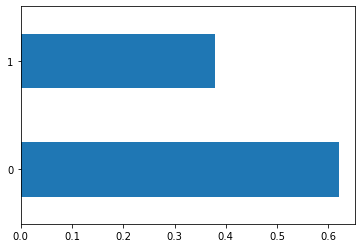

In [104]:
lead_data.Converted.value_counts(normalize=True).plot.barh()
plt.show()

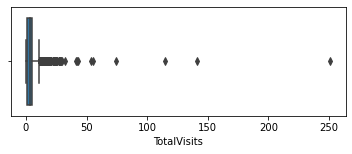

In [105]:
plt.figure(figsize=[6,2])
sns.boxplot(lead_data.TotalVisits)
plt.show()

In [106]:
lead_data.TotalVisits.quantile([.5,.7,0.9,0.95,.99])

0.50     3.0
0.70     4.0
0.90     7.0
0.95    10.0
0.99    17.0
Name: TotalVisits, dtype: float64

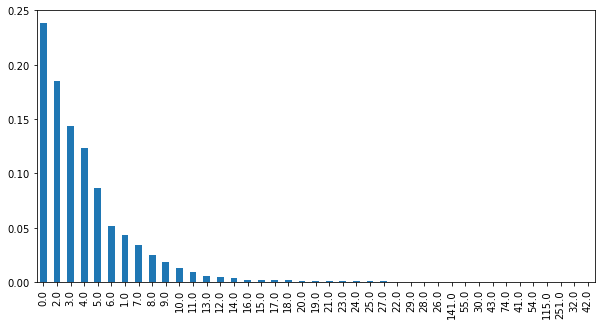

In [107]:
plt.figure(figsize = (10,5))
lead_data.TotalVisits.value_counts(normalize=True).plot.bar()
plt.show()

# ## Categorical Variables

In [108]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9074 non-null   int64  
 1   Lead Origin                             9074 non-null   object 
 2   Lead Source                             9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   Tags                                    9074 non-null   object 
 10  City                                    9074 non-null   obje

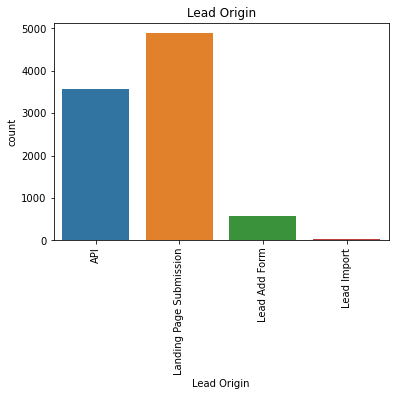

In [109]:
sns.countplot(lead_data['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')
plt.show()

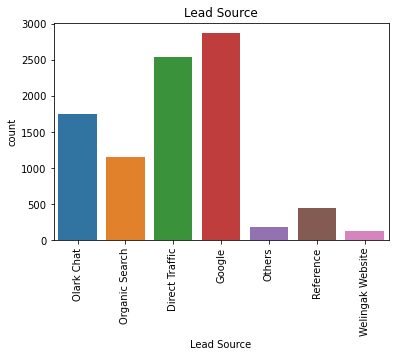

In [110]:
sns.countplot(lead_data['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

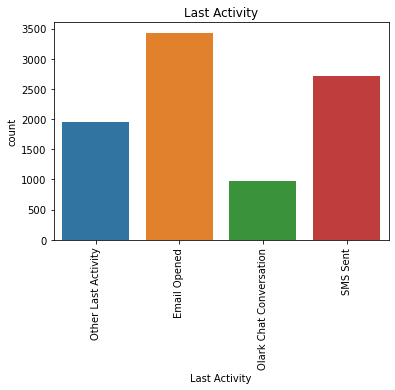

In [111]:
sns.countplot(lead_data['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

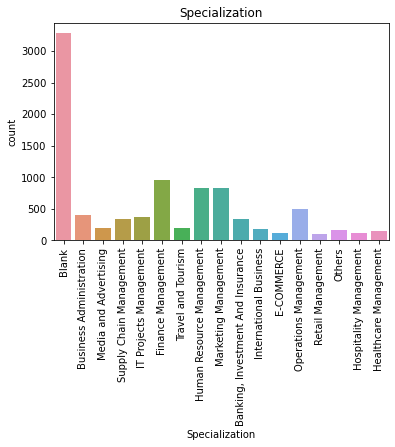

In [112]:
sns.countplot(lead_data['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.show()

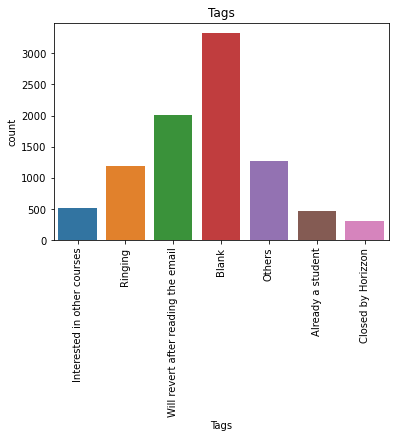

In [113]:
sns.countplot(lead_data['Tags']).tick_params(axis='x', rotation = 90)
plt.title('Tags')
plt.show()

# Bivariate Analysis

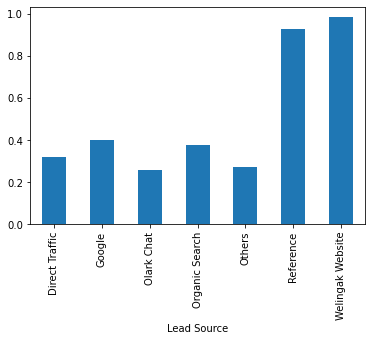

In [114]:
lead_data.groupby(['Lead Source'])['Converted'].mean().plot.bar()
plt.show()

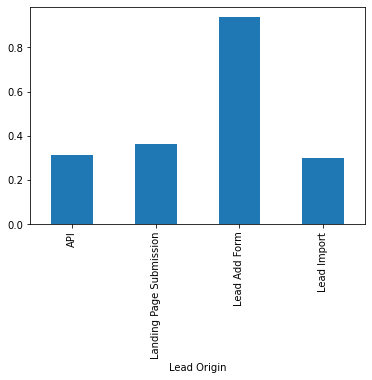

In [115]:
lead_data.groupby(['Lead Origin'])['Converted'].mean().plot.bar()
plt.show()

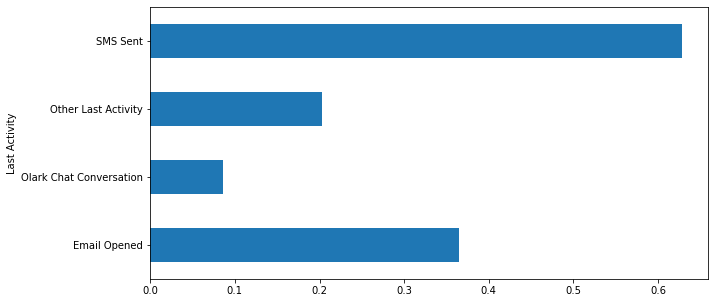

In [116]:
plt.figure(figsize = (10,5))
lead_data.groupby(['Last Activity'])['Converted'].mean().plot.barh()
plt.show()

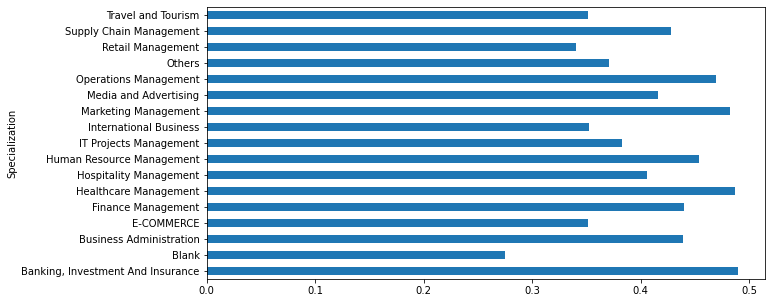

In [117]:
plt.figure(figsize = (10,5))
lead_data.groupby(['Specialization'])['Converted'].mean().plot.barh()
plt.show()

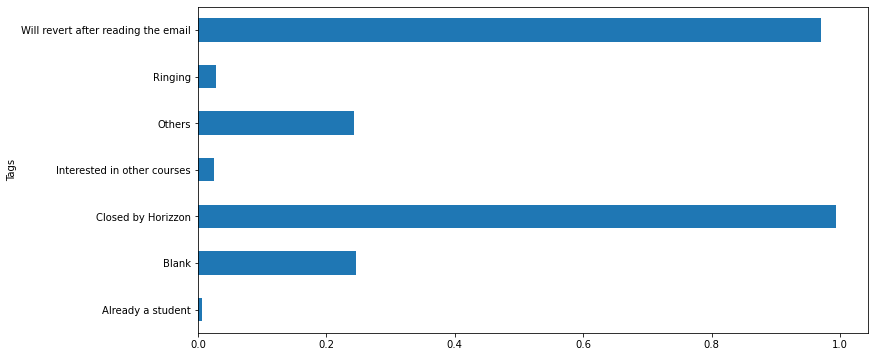

In [118]:
plt.figure(figsize = (12,6))
lead_data.groupby(['Tags'])['Converted'].mean().plot.barh()
plt.show()

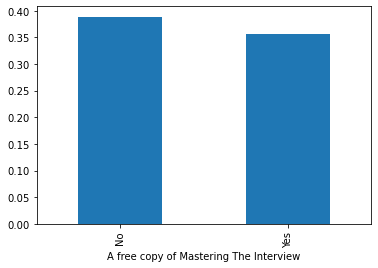

In [119]:

lead_data.groupby(['A free copy of Mastering The Interview'])['Converted'].mean().plot.bar()
plt.show()

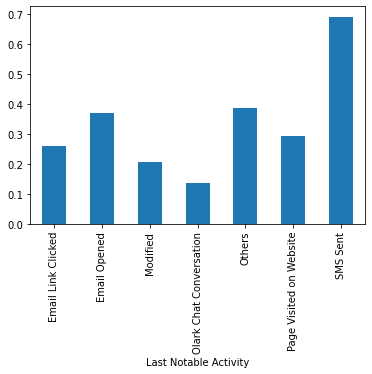

In [120]:

lead_data.groupby(['Last Notable Activity'])['Converted'].mean().plot.bar()
plt.show()

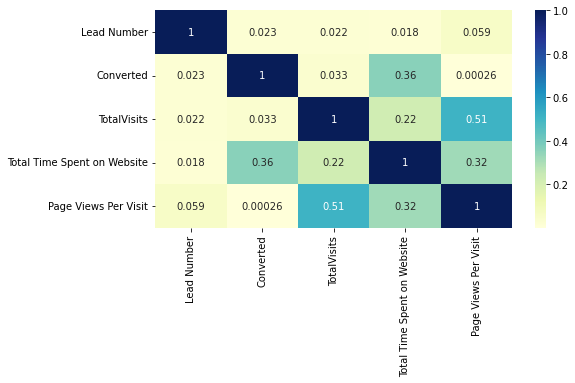

In [121]:
plt.figure(figsize=(8,4))
sns.heatmap(lead_data.corr(), cmap="YlGnBu", annot=True);
plt.show()

# Data Preparation

# Create dummies for categorical variables

In [122]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Tags','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
lead_data = pd.concat([lead_data, dummy1], axis=1)

In [123]:
lead_data.head()

,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Tags,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,API,Olark Chat,0,0.0,0,0.0,Other Last Activity,Blank,Interested in other courses,...,0,0,0,0,0,1,0,0,0,0
1,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Blank,Ringing,...,0,0,0,0,1,0,0,0,0,0
2,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Will revert after reading the email,...,0,0,0,0,1,0,0,0,0,0
3,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Other Last Activity,Media and Advertising,Ringing,...,0,0,0,0,0,1,0,0,0,0
4,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Other Last Activity,Blank,Will revert after reading the email,...,0,0,0,0,0,1,0,0,0,0


In [124]:
lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Tags','City','Last Notable Activity'],axis=1,inplace=True)

In [125]:
lead_data.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0.0,0,0.0,No,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,660728,0,5.0,674,2.5,No,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,660727,1,2.0,1532,2.0,Yes,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,660719,0,1.0,305,1.0,No,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,660681,1,2.0,1428,1.0,No,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [126]:
lead_data['A free copy of Mastering The Interview'] = lead_data['A free copy of Mastering The Interview'].map({'Yes': 1, "No": 0})

In [127]:
lead_data['A free copy of Mastering The Interview'].value_counts(normalize=True)

0    0.681728
1    0.318272
Name: A free copy of Mastering The Interview, dtype: float64

In [128]:
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Converted                                      9074 non-null   int64  
 2   TotalVisits                                    9074 non-null   float64
 3   Total Time Spent on Website                    9074 non-null   int64  
 4   Page Views Per Visit                           9074 non-null   float64
 5   A free copy of Mastering The Interview         9074 non-null   int64  
 6   Lead Origin_Landing Page Submission            9074 non-null   uint8  
 7   Lead Origin_Lead Add Form                      9074 non-null   uint8  
 8   Lead Origin_Lead Import                        9074 non-null   uint8  
 9   Lead Source_Google                             9074 

In [129]:
num_lead_data = lead_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

In [130]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_lead_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


No major outliers to handle.Leavng the data as it is.

In [131]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Lead Number                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
A free copy of Mastering The Interview           0.0
Lead Origin_Landing Page Submission              0.0
Lead Origin_Lead Add Form                        0.0
Lead Origin_Lead Import                          0.0
Lead Source_Google                               0.0
Lead Source_Olark Chat                           0.0
Lead Source_Organic Search                       0.0
Lead Source_Others                               0.0
Lead Source_Reference                            0.0
Lead Source_Welingak Website                     0.0
Last Activity_Olark Chat Conversation            0.0
Last Activity_Other Last Activity                0.0
Last Activity_SMS Sent                           0.0
Specialization_Blank                          

# Train-Test Split

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
# Putting feature variable to X
x = lead_data.drop(['Converted','Lead Number'], axis=1)
 
x.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [134]:
# Putting response variable to y
y = lead_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [135]:
# Splitting the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [136]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 49 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   TotalVisits                                    6351 non-null   float64
 1   Total Time Spent on Website                    6351 non-null   int64  
 2   Page Views Per Visit                           6351 non-null   float64
 3   A free copy of Mastering The Interview         6351 non-null   int64  
 4   Lead Origin_Landing Page Submission            6351 non-null   uint8  
 5   Lead Origin_Lead Add Form                      6351 non-null   uint8  
 6   Lead Origin_Lead Import                        6351 non-null   uint8  
 7   Lead Source_Google                             6351 non-null   uint8  
 8   Lead Source_Olark Chat                         6351 non-null   uint8  
 9   Lead Source_Organic Search                     63

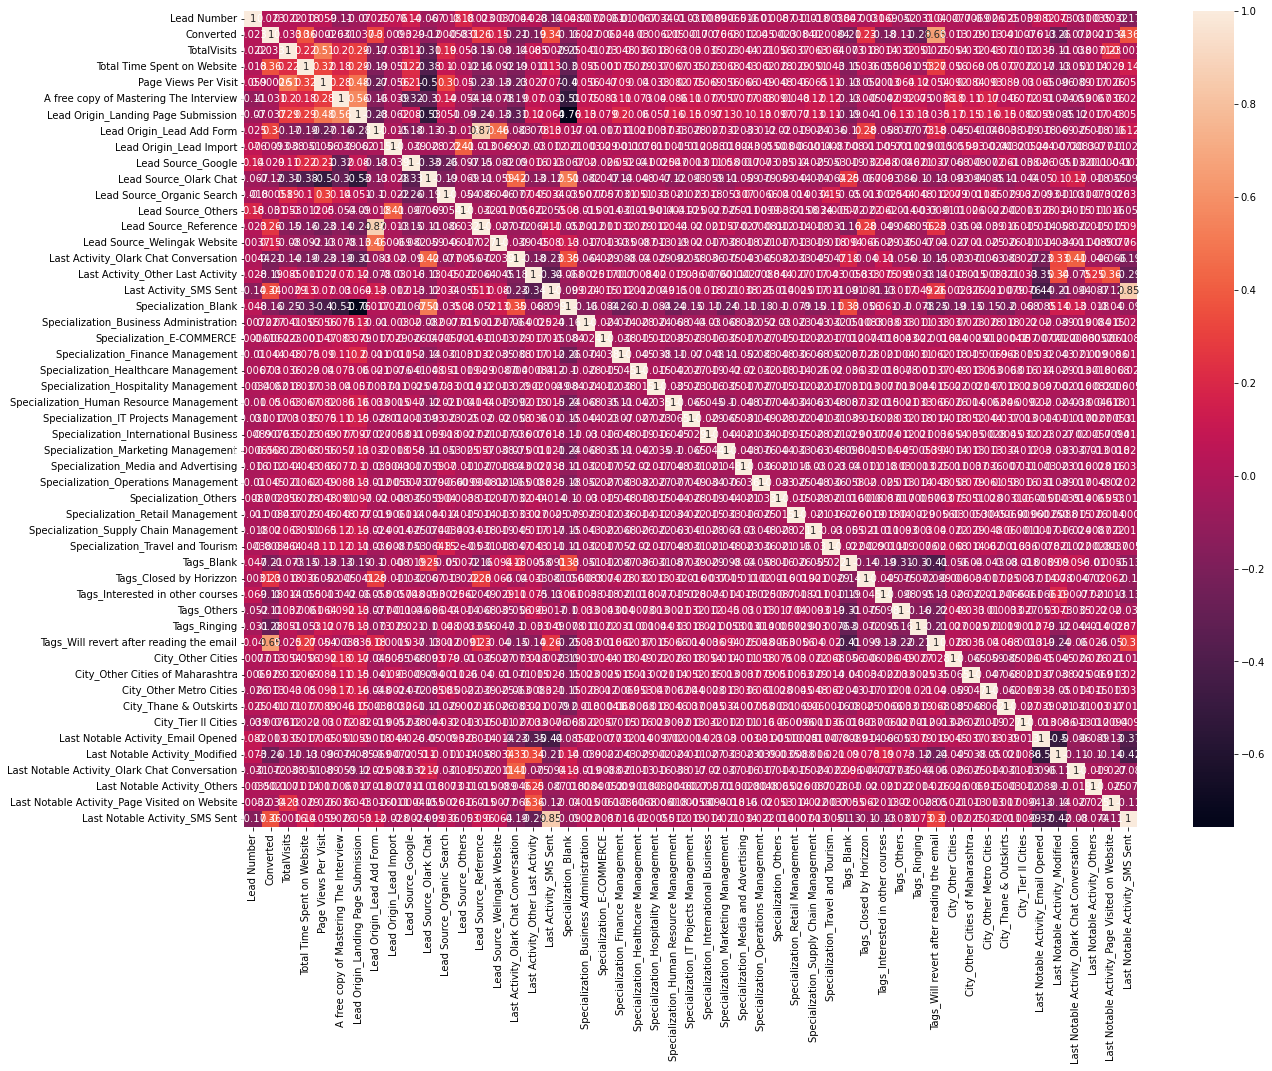

In [137]:
# correlation matrix
plt.figure(figsize = (20,15))       
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

Will select variables through RFE and eliminate unwanted ones

# Feature Scaling

In [138]:
from sklearn.preprocessing import StandardScaler

In [139]:
scaler = StandardScaler()

x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(x_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

x_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,-0.284595,-0.160255,-0.179666,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1012,-0.284595,-0.540048,-0.179666,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9226,-0.671384,-0.888650,-1.132538,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4750,-0.284595,1.643304,-0.179666,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7987,0.295588,2.017593,0.058552,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [140]:
### Checking the Converted Rate
converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
converted

37.85541106458012

We almost have 38% converted rate

# Model Building

In [141]:
import statsmodels.api as sm

In [142]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(x_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           49
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1392.3
Date:                Tue, 18 Oct 2022   Deviance:                       2784.5
Time:                        21:17:02   Pearson chi2:                 8.12e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5912
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.1003      0.917     -4.473      0.000      -5.897      -2.304
TotalVisits                                       0.1438      0.039      3.643      0.000       0.066       0.221
Total Time Spent on Website                       1.1984      0.059     20.301      0.000       1.083       1.314
Page Views Per Visit                             -0.1059      0.071     -1.502      0.133      -0.244       0.032
A free copy of Mastering The Interview            0.0984      0.161      0.609      0.542      -0.218       0.415
Lead Origin_Landing Page Submission              -0.8482      0.212     -3.997      0.000      -1.264      -0.432
Lead Origin_Lead Add Form                        -0.7853      1.645     -0.477      0.633      -4.009       2.438
Lead Origin_Lead Import                           1.1376      0.908      1.253      0.210      -0.642       2.917
Lead Source_Google                                0.2165      0.168      1.287      0.198      -0.113       0.546
Lead Source_Olark Chat                            1.2834      0.226      5.680      0.000       0.841       1.726
Lead Source_Organic Search                       -0.1340      0.195     -0.686      0.493      -0.517       0.249
Lead Source_Others                                0.0536      0.440      0.122      0.903      -0.808       0.915
Lead Source_Reference                             3.0676      1.692      1.813      0.070      -0.249       6.384
Lead Source_Welingak Website                      6.3351      1.803      3.513      0.000       2.800       9.870
Last Activity_Olark Chat Conversation            -1.3091      0.301     -4.347      0.000      -1.899      -0.719
Last Activity_Other Last Activity                -0.6725      0.251     -2.675      0.007      -1.165      -0.180
Last Activity_SMS Sent                            0.6675      0.253      2.642      0.008       0.172       1.163
Specialization_Blank                             -0.6447      0.339     -1.901      0.057      -1.310       0.020
Specialization_Business Administration           -0.4566      0.371     -1.229      0.219      -1.185       0.271
Specialization_E-COMMERCE                         0.0011      0.535      0.002      0.998      -1.048       1.050
Specialization_Finance Management                -0.3380      0.320     -1.058      0.290      -0.964       0.288
Specialization_Healthcare Management             -0.9323      0.478     -1.951      0.051      -1.869       0.004
Specialization_Hospitality Management            -0.7809      0.556     -1.404      0.160      -1.871       0.310
Specialization_Human Resource Management         -0.4881      0.325     -1.501      0.133      -1.125       0.149
Speci

# Feature Selecton using RFE

In [143]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [144]:
from sklearn.feature_selection import RFE

In [145]:
rfe = RFE(logreg , n_features_to_select=15)

In [146]:
rfe = rfe.fit(x_train, y_train)

In [147]:
rfe.support_

array([False,  True, False, False, False,  True,  True, False,  True,
       False, False, False,  True,  True, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True, False,  True,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False,  True])

In [148]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))


[('TotalVisits', False, 26),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 27),
 ('A free copy of Mastering The Interview', False, 34),
 ('Lead Origin_Landing Page Submission', False, 2),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 22),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Others', False, 35),
 ('Lead Source_Reference', False, 14),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other Last Activity', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Blank', False, 12),
 ('Specialization_Business Administration', False, 24),
 ('Specialization_E-COMMERCE', False, 16),
 ('Specialization_Finance Management', False, 30),
 ('Specialization_Healthcare Management', False, 7),
 ('Specialization_Hospitality Management', False, 10),
 ('Specialization_Human Reso

In [149]:
col = x_train.columns[rfe.support_]

In [150]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Travel and Tourism',
       'Tags_Blank', 'Tags_Closed by Horizzon', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [151]:
x_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Other Last Activity',
       'Specialization_Blank', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management',
       'Tags_Interested in other courses', 'City_Other Cities',


# Assessing the models with StatsModels

In [152]:
x_train_sm = sm.add_constant(x_train[col])
logm2 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1440.5
Date:                Tue, 18 Oct 2022   Deviance:                       2881.0
Time:                        21:17:06   Pearson chi2:                 6.78e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5850
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.0965      0.304    -13.495      0.000      -4.691      -3.502
Total Time Spent on Website                  1.1708      0.056     20.731      0.000       1.060       1.282
Lead Origin_Lead Add Form                    2.6308      0.388      6.783      0.000       1.871       3.391
Lead Origin_Lead Import                      1.6077      0.784      2.051      0.040       0.072       3.144
Lead Source_Olark Chat                       1.5930      0.144     11.056      0.000       1.311       1.875
Lead Source_Welingak Website                 3.2643      0.819      3.985      0.000       1.659       4.870
Last Activity_Olark Chat Conversation       -1.0222      0.219     -4.664      0.000      -1.452      -0.593
Last Activity_SMS Sent                       1.0211      0.203      5.042      0.000       0.624       1.418
Specialization_Travel and Tourism           -1.1440      0.387     -2.958      0.003      -1.902      -0.386
Tags_Blank                                   2.2893      0.302      7.579      0.000       1.697       2.881
Tags_Closed by Horizzon                      8.5394      0.781     10.935      0.000       7.009      10.070
Tags_Others                                  2.2059      0.312      7.075      0.000       1.595       2.817
Tags_Ringing                                -1.2706      0.388     -3.272      0.001      -2.032      -0.510
Tags_Will revert after reading the email     6.9832      0.350     19.962      0.000       6.298       7.669
Last Notable Activity_Modified              -0.8778      0.136     -6.440      0.000      -1.145      -0.611
Last Notable Activity_SMS Sent               0.8545      0.234      3.647      0.000       0.395       1.314
============================================================================================================
"""

In [153]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10] 

3009    0.119744
1012    0.080208
9226    0.009274
4750    0.880004
7987    0.649071
1281    0.997087
2880    0.055248
4971    0.744617
7536    0.997752
1248    0.045285
dtype: float64

In [154]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11974364, 0.08020782, 0.00927444, 0.88000371, 0.64907125,
       0.99708715, 0.05524842, 0.74461663, 0.99775157, 0.04528466])

In [155]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
0,0,0.119744,3009
1,0,0.080208,1012
2,0,0.009274,9226
3,1,0.880004,4750
4,1,0.649071,7987


In [156]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
0,0,0.119744,3009,0
1,0,0.080208,1012,0
2,0,0.009274,9226,0
3,1,0.880004,4750,1
4,1,0.649071,7987,1


In [157]:
from sklearn import metrics

In [158]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3731  174]
 [ 393 2053]]


In [159]:
# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9107227208313652


In [160]:
#### Checking VIFs

In [161]:
# Checking for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [162]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_SMS Sent,6.40
6,Last Activity_SMS Sent,6.28
13,Last Notable Activity_Modified,2.14
1,Lead Origin_Lead Add Form,1.83
3,Lead Source_Olark Chat,1.81
12,Tags_Will revert after reading the email,1.75
8,Tags_Blank,1.71
5,Last Activity_Olark Chat Conversation,1.60
0,Total Time Spent on Website,1.44
4,Lead Source_Welingak Website,1.37


Dropping column with highest vif

In [163]:
col = col.drop('Last Notable Activity_SMS Sent',1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Specialization_Travel and Tourism',
       'Tags_Blank', 'Tags_Closed by Horizzon', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [164]:
# re-running the model using the selected variables
x_train_sm = sm.add_constant(x_train[col])
logm3 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1447.2
Date:                Tue, 18 Oct 2022   Deviance:                       2894.5
Time:                        21:17:06   Pearson chi2:                 6.61e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5841
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.0285      0.304    -13.270      0.000      -4.624      -3.434
Total Time Spent on Website                  1.1689      0.056     20.737      0.000       1.058       1.279
Lead Origin_Lead Add Form                    2.5248      0.386      6.542      0.000       1.768       3.281
Lead Origin_Lead Import                      1.4866      0.778      1.911      0.056      -0.038       3.011
Lead Source_Olark Chat                       1.5815      0.143     11.063      0.000       1.301       1.862
Lead Source_Welingak Website                 3.3522      0.820      4.087      0.000       1.745       4.960
Last Activity_Olark Chat Conversation       -0.9005      0.217     -4.147      0.000      -1.326      -0.475
Last Activity_SMS Sent                       1.6499      0.105     15.640      0.000       1.443       1.857
Specialization_Travel and Tourism           -1.1328      0.387     -2.930      0.003      -1.890      -0.375
Tags_Blank                                   2.2913      0.303      7.559      0.000       1.697       2.885
Tags_Closed by Horizzon                      8.6806      0.782     11.101      0.000       7.148      10.213
Tags_Others                                  2.2481      0.313      7.190      0.000       1.635       2.861
Tags_Ringing                                -1.1554      0.386     -2.992      0.003      -1.912      -0.399
Tags_Will revert after reading the email     7.0364      0.352     20.013      0.000       6.347       7.726
Last Notable Activity_Modified              -1.1824      0.112    -10.594      0.000      -1.401      -0.964
============================================================================================================
"""

# Dropping column with high p value

In [165]:
col = col.drop('Lead Origin_Lead Import',1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'Specialization_Travel and Tourism', 'Tags_Blank',
       'Tags_Closed by Horizzon', 'Tags_Others', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Last Notable Activity_Modified'],
      dtype='object')

In [166]:
# re-running the model using the selected variables
x_train_sm = sm.add_constant(x_train[col])
logm4 = sm.GLM(y_train,x_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1448.9
Date:                Tue, 18 Oct 2022   Deviance:                       2897.7
Time:                        21:17:06   Pearson chi2:                 6.60e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5839
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.0177      0.303    -13.250      0.000      -4.612      -3.423
Total Time Spent on Website                  1.1606      0.056     20.693      0.000       1.051       1.271
Lead Origin_Lead Add Form                    2.5074      0.386      6.498      0.000       1.751       3.264
Lead Source_Olark Chat                       1.5643      0.142     10.984      0.000       1.285       1.843
Lead Source_Welingak Website                 3.3517      0.820      4.087      0.000       1.744       4.959
Last Activity_Olark Chat Conversation       -0.9029      0.217     -4.158      0.000      -1.328      -0.477
Last Activity_SMS Sent                       1.6486      0.105     15.634      0.000       1.442       1.855
Specialization_Travel and Tourism           -1.1422      0.387     -2.952      0.003      -1.901      -0.384
Tags_Blank                                   2.2920      0.303      7.568      0.000       1.698       2.886
Tags_Closed by Horizzon                      8.6726      0.782     11.093      0.000       7.140      10.205
Tags_Others                                  2.2453      0.312      7.187      0.000       1.633       2.858
Tags_Ringing                                -1.1528      0.386     -2.987      0.003      -1.909      -0.396
Tags_Will revert after reading the email     7.0476      0.351     20.059      0.000       6.359       7.736
Last Notable Activity_Modified              -1.1820      0.112    -10.595      0.000      -1.401      -0.963
============================================================================================================
"""

In [167]:
# Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Origin_Lead Add Form,1.83
2,Lead Source_Olark Chat,1.80
5,Last Activity_SMS Sent,1.69
7,Tags_Blank,1.69
12,Last Notable Activity_Modified,1.68
11,Tags_Will revert after reading the email,1.67
4,Last Activity_Olark Chat Conversation,1.55
0,Total Time Spent on Website,1.43
3,Lead Source_Welingak Website,1.37
8,Tags_Closed by Horizzon,1.21


In [168]:
# Getting the predicted values on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10] 

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)


y_train_pred_final.head()

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

# overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

[[3732  173]
 [ 382 2064]]
0.9126121870571563


# Metrics beyond simple accuracy

In [169]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [170]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8438266557645135

In [171]:
# specificity
TN / float(TN+FP)

0.9556978233034571

In [172]:
# Calculate false postive rate - predicting converted when student does not have converted
print(FP/ float(TN+FP))

0.04430217669654289


In [173]:
# positive predictive value 
print (TP / float(TP+FP))

0.9226642825212338


In [174]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9071463296062227


# Plotting ROC Curve

In [175]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic-Converted')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [176]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

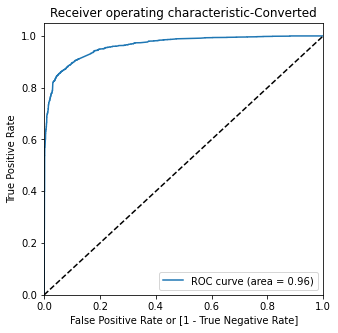

In [177]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

The ROC area from the above plot is 0.96 indcating good predictve model

# Finding optimal cut-off point

In [178]:
# creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.128789,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.086867,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.015202,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.861773,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.738039,7987,1,1,1,1,1,1,1,1,1,0,0


In [179]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.800661  0.967702  0.696031
0.2   0.2  0.867265  0.941537  0.820743
0.3   0.3  0.898756  0.895748  0.900640
0.4   0.4  0.907731  0.866721  0.933419
0.5   0.5  0.912612  0.843827  0.955698
0.6   0.6  0.911510  0.822159  0.967478
0.7   0.7  0.896394  0.768602  0.976440
0.8   0.8  0.886475  0.729354  0.984891
0.9   0.9  0.869154  0.674980  0.990781


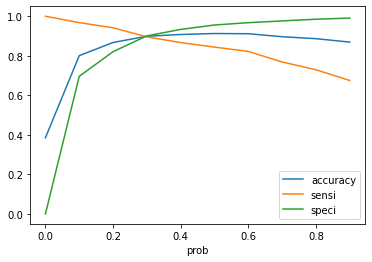

In [180]:
# plot for accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.


In [181]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.128789,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.086867,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.015202,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.861773,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.738039,7987,1,1,1,1,1,1,1,1,1,0,0,1


Lead Score calculation:

In [223]:
y_train_pred_final['lead_Score'] = round(y_train_pred_final['Converted_Prob']*100)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_Score
0,0,0.128789,3009,0,1,1,0,0,0,0,0,0,0,0,0,13.0
1,0,0.086867,1012,0,1,0,0,0,0,0,0,0,0,0,0,9.0
2,0,0.015202,9226,0,1,0,0,0,0,0,0,0,0,0,0,2.0
3,1,0.861773,4750,1,1,1,1,1,1,1,1,1,1,0,1,86.0
4,1,0.738039,7987,1,1,1,1,1,1,1,1,1,0,0,1,74.0


In [182]:
# overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8987561014013541

In [183]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3517,  388],
       [ 255, 2191]], dtype=int64)

In [184]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [185]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8957481602616517

In [186]:
# specificity
TN / float(TN+FP)

0.900640204865557

In [187]:
# Calculate false postive rate - predicting converted when student does not have converted
print(FP/ float(TN+FP))

0.09935979513444303


In [188]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8495540907328422


In [189]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9323966065747614


## Precision and Recall

In [190]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3732,  173],
       [ 382, 2064]], dtype=int64)

##### Precision
TP / TP + FP

In [191]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9226642825212338

##### Recall
TP / TP + FN

In [192]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8438266557645135

Using sklearn utilities for the same

In [193]:
from sklearn.metrics import precision_score, recall_score

In [194]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.9226642825212338

In [195]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8438266557645135

### Precision and recall tradeoff

In [196]:
from sklearn.metrics import precision_recall_curve

In [197]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [198]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

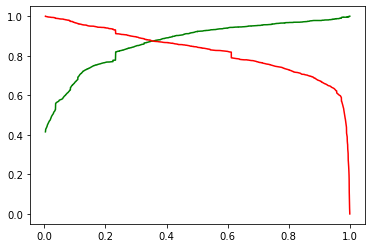

In [199]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

###  Making predictions on the test set

In [200]:
x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(x_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

x_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3271,0.102194,-0.600595,0.773206,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1490,0.295588,1.887326,1.249642,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7936,-0.284595,-0.752879,-0.179666,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4216,-0.671384,-0.888650,-1.132538,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3830,0.875771,-0.587751,2.678951,1,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [201]:
x_test = x_test[col]
x_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,Specialization_Travel and Tourism,Tags_Blank,Tags_Closed by Horizzon,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Last Notable Activity_Modified
3271,-0.600595,0,0,0,0,0,0,1,0,0,0,0,0
1490,1.887326,0,0,0,0,0,0,0,0,0,0,1,0
7936,-0.752879,0,0,0,0,0,0,1,0,0,0,0,0
4216,-0.888650,1,0,0,0,0,0,0,1,0,0,0,1
3830,-0.587751,0,0,0,0,0,0,1,0,0,0,0,0


In [202]:
x_test_sm = sm.add_constant(x_test)

Making predictions on the test set

In [203]:
y_test_pred = res.predict(x_test_sm)

In [204]:
y_test_pred[:10]

3271    0.081453
1490    0.994623
7936    0.069170
4216    0.992959
3830    0.082575
1800    0.896630
6507    0.013672
4821    0.205623
4223    0.997880
4714    0.326027
dtype: float64

In [205]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [206]:

y_pred_1.head()

,0
3271,0.081453
1490,0.994623
7936,0.069170
4216,0.992959
3830,0.082575


In [207]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [208]:
# Putting Lead Number to index
y_test_df['Lead Number'] = y_test_df.index

In [209]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [210]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [211]:
y_pred_final.head()

,Converted,Lead Number,0
0,0,3271,0.081453
1,1,1490,0.994623
2,0,7936,0.069170
3,1,4216,0.992959
4,0,3830,0.082575


In [212]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [213]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Converted_Prob'], axis=1)

In [214]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob
0,3271,0,0.081453
1,1490,1,0.994623
2,7936,0,0.069170
3,4216,1,0.992959
4,3830,0,0.082575


In [215]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [216]:
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted
0,3271,0,0.081453,0
1,1490,1,0.994623,1
2,7936,0,0.069170,0
3,4216,1,0.992959,1
4,3830,0,0.082575,0


Lead Score calculation:

In [217]:
y_pred_final['lead_Score'] = round(y_pred_final['Converted_Prob']*100)
y_pred_final.head()

,Lead Number,Converted,Converted_Prob,final_predicted,lead_Score
0,3271,0,0.081453,0,8.0
1,1490,1,0.994623,1,99.0
2,7936,0,0.069170,0,7.0
3,4216,1,0.992959,1,99.0
4,3830,0,0.082575,0,8.0


In [218]:
# overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8854204921042967

In [219]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1551,  183],
       [ 129,  860]], dtype=int64)

In [220]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [221]:
# sensitivity of our logistic regression model
TP / float(TP+FN)

0.8695652173913043

In [222]:
# specificity
TN / float(TN+FP)

0.8944636678200693

Below are the observatons from the model:

Train data:
Accuracy  : 89.8
sensitivity :89.5
specificity : 90.06

Test data:
Accuracy  : 88.5
sensitivity :86.9
specificity : 89.4

